In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('data/training_data.txt', delimiter='\t', header=0)

In [3]:
train_df.shape

(7767, 563)

In [4]:
train_df

,subject,activity,F1,F2,F3,F4,F5,F6,F7,F8,...,F552,F553,F554,F555,F556,F557,F558,F559,F560,F561
0,1,5,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,1,5,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,1,5,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,1,5,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,1,5,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,30,2,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,30,2,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,30,2,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,30,2,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


In [5]:
train_df['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [6]:
train_df['activity'].unique()

array([ 5,  7,  4,  8, 11,  6, 10,  9, 12,  1,  3,  2])

In [7]:
test_df = pd.read_csv('data/test_data.txt', delimiter='\t', header=0)

In [8]:
test_df.head()

,subject,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F552,F553,F554,F555,F556,F557,F558,F559,F560,F561
0,2,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,2,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,2,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,2,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849


In [9]:
test_df['subject'].unique()

array([ 2,  4,  9, 10, 12, 13, 18, 20, 24])

In [10]:
test_df.shape

(3162, 562)

In [11]:
binary_df = train_df.copy()

In [12]:
# replace dynamic postures with 1 and all other with 0
binary_df['activity'] = binary_df['activity'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

/Users/melissawang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


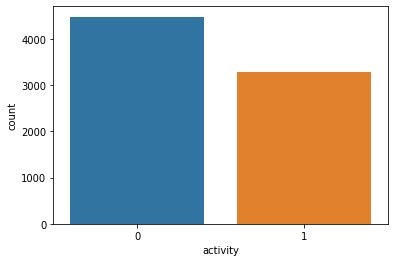

In [13]:
sns.countplot('activity',data=binary_df)
plt.show()

In [14]:
multiclass_df = train_df.copy()

In [15]:
# replace transition postures with 7
multiclass_df['activity'] = multiclass_df['activity'].apply(lambda x: 7 if x in [8, 9, 10, 11, 12] else x)

In [16]:
multiclass_df['activity'].unique()

array([5, 7, 4, 6, 1, 3, 2])

/Users/melissawang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


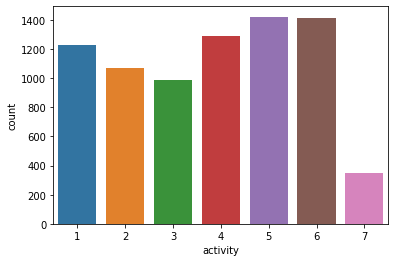

In [17]:
sns.countplot('activity',data=multiclass_df)
plt.show()

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Binary Task

In [20]:
X_b = binary_df.drop('activity', axis=1)
y_b = binary_df['activity']
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.3, random_state=42)

### RF

In [21]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)

rf.fit(X_train_b, y_train_b)

y_pred = rf.predict(X_test_b)

print("Accuracy:", accuracy_score(y_test_b, y_pred))


Accuracy: 0.9991419991419992


In [22]:
# Accuracy: 0.9991419991419992
# Precision: 0.999259807549963
# Recall: 0.9989816700610998
# F1 score: 0.999119945633707

In [23]:
# folds = KFold(n_splits = 5, shuffle = True, random_state = 10)
# rf = RandomForestClassifier(random_state=0)

# # parameters = {'max_depth':[7, 14, 25, 46, 60],
# #               'n_estimators':[200, 400, 600, 800, 1200],
# #               'max_features':[100, 200, 400, 600]}

# parameters = {'max_depth':[7, 14, 25, 50],
#               'n_estimators':[200, 400, 600],
#               'max_features':[100, 300, 600]}

# rf_cv = GridSearchCV(rf, parameters, scoring='accuracy', cv = folds, n_jobs = -1)
# rf_cv.fit(X_train_b,y_train_b)
# accuracy = rf_cv.score(X_test_b, y_test_b)
# accuracy

In [24]:
# rf_cv.best_params_

In [25]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

rf.fit(X_train_b, y_train_b)

y_pred_b1 = rf.predict(test_df)

### Logistic Regression

In [26]:
log_model = LogisticRegression()
log_model.fit(X_train_b, y_train_b)
# predict on test data
log_pred = log_model.predict(X_test_b)

# evaluate accuracy
log_accuracy = accuracy_score(y_test_b, log_pred)
print("Accuracy:", log_accuracy)

Accuracy: 1.0


/Users/melissawang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
log_model = LogisticRegression()
log_model.fit(X_train_b, y_train_b)
# predict on test data
y_pred_b2 = log_model.predict(test_df)

/Users/melissawang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
len(log_pred)

2331

### SVM

In [29]:
from sklearn.svm import SVC

In [30]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_b, y_train_b)
svm_pred = svm.predict(X_test_b)

In [31]:
svm_accuracy = accuracy_score(y_test_b, svm_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 1.0


In [32]:
# train on whole dataset
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_b, y_train_b)

y_pred_b3 = svm.predict(test_df)

In [33]:
# data = {'outcome': svm_pred}
# df = pd.DataFrame(data)

# # specify the file path to save the text file
# file_path = 'binary_h0606w.txt'

# # extract the column and save it to a text file
# df['outcome'].to_csv(file_path, index=False, header=False)

### Lasso

In [36]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=3000)

# Perform 5-fold cross-validation
scores = cross_val_score(lasso, X_train_b, y_train_b, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores: [1.         1.         1.         0.99908004 1.        ]
Mean cross-validation score: 0.9998160073597055


In [217]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=3000)
lasso.fit(X_train_b, y_train_b)
# predict on test data
lasso_pred_b = lasso.predict(test_df)

### XGboost

In [215]:
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train_b, y_train_b)

y_pred = xgboost.predict(X_test_b)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test_b, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9978549978549979


In [216]:
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train_b, y_train_b)
xgb_pred_b = xgboost.predict(test_df)

### Ensemble all together

In [218]:
# create DataFrame with one column for each model's predictions
ensemble_b = pd.DataFrame({'RF': y_pred_b1, 'logistic':y_pred_b2 , 'SVM':y_pred_b3, 'xgboost':xgb_pred_b, 'lasso': lasso_pred_b})

# compute majority vote for each row (i.e., sample)
ensemble_b['majority_vote'] = ensemble_b.mode(axis=1)[0]

In [219]:
ensemble_b

,RF,logistic,SVM,xgboost,lasso,majority_vote
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
3157,1,1,1,1,1,1
3158,1,1,1,1,1,1
3159,1,1,1,1,1,1
3160,1,1,1,1,1,1


In [220]:
# find rows where at least one entry is not the same across three columns
mask = (ensemble_b['RF'] != ensemble_b['logistic']) | (ensemble_b['RF'] != ensemble_b['SVM']) | (ensemble_b['logistic'] != ensemble_b['SVM'])
result = ensemble_b[mask]

result

,RF,logistic,SVM,xgboost,lasso,majority_vote
368,1,0,0,0,1,0
543,1,0,0,0,0,0
544,1,0,0,0,0,0
773,1,0,0,1,1,1
776,1,0,0,1,1,1
1469,0,1,1,0,1,1


In [221]:
last_pred = pd.read_csv('binary_h0606w_2.txt', header=None)
ensemble_b['last_pred'] = last_pred[0]

In [222]:
mask = (ensemble_b['majority_vote'] != ensemble_b['last_pred'])
ensemble_b[mask]

,RF,logistic,SVM,xgboost,lasso,majority_vote,last_pred
773,1,0,0,1,1,1,0
776,1,0,0,1,1,1,0


In [223]:
file_path = 'binary_h0606w.txt'

# extract the column and save it to a text file
ensemble_b['majority_vote'].to_csv(file_path, index=False, header=False)

## Multi-class Task

In [43]:
X_m = multiclass_df.drop('activity', axis=1)
y_m = multiclass_df['activity']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.3, random_state=42)

### Logistic Regression

In [114]:
log_model = LogisticRegression()
log_model.fit(X_train_m, y_train_m)
# predict on test data
log_pred_test = log_model.predict(X_test_m)

# evaluate accuracy
log_accuracy = accuracy_score(y_test_m, log_pred_test)
print("Accuracy:", log_accuracy)

Accuracy: 0.9802659802659802


/Users/melissawang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
log_model = LogisticRegression()
log_model.fit(X_m, y_m)
# predict on test data
log_pred_m = log_model.predict(test_df)

/Users/melissawang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
len(log_pred_m)

3162

In [48]:
log_model = LogisticRegression()
log_model.fit(X_train_m, y_train_m)
# predict on test data
y_pred_m1 = log_model.predict(test_df)

/Users/melissawang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Ridge

In [50]:
from sklearn.model_selection import cross_val_score
ridge = LogisticRegression(penalty='l2', solver='liblinear', max_iter=3000)

# Perform 5-fold cross-validation
scores = cross_val_score(ridge, X_train_m, y_train_m, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores: [0.98621324 0.97608096 0.97884085 0.98528059 0.98160074]
Mean cross-validation score: 0.9816032726338004


In [115]:
log2_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=3000)
log2_model.fit(X_train_m, y_train_m)
# predict on test data
log2_pred_test = log2_model.predict(X_test_m)

# evaluate accuracy
log_accuracy = accuracy_score(y_test_m, log2_pred_test)
print("Accuracy:", log_accuracy)

Accuracy: 0.9824109824109825


In [206]:
log2_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=3000)
log2_model.fit(X_train_m, y_train_m)
# predict on test data
log2_pred_m = log2_model.predict(test_df)

### Lasso

In [51]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=3000)

# Perform 5-fold cross-validation
scores = cross_val_score(lasso, X_train_m, y_train_m, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores: [0.98253676 0.97332107 0.97792088 0.98620055 0.97608096]
Mean cross-validation score: 0.9792120447535041


In [117]:
log3_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=3000)
log3_model.fit(X_train_m, y_train_m)
# predict on test data
lasso_pred_test = log3_model.predict(X_test_m)

# evaluate accuracy
log_accuracy = accuracy_score(y_test_m, lasso_pred_test)
print("Accuracy:", log_accuracy)

Accuracy: 0.9836979836979837


In [225]:
log3_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=3000)
log3_model.fit(X_train_m, y_train_m)
# predict on test data
lasso_pred_m = log3_model.predict(test_df)

### SVM

In [52]:
# train on whole dataset
svm = SVC(C=10, gamma=0.01, kernel='rbf', random_state=42)
svm.fit(X_m, y_m)

svm_pred = svm.predict(test_df)

In [53]:
# data = {'outcome': svm_pred}
# df = pd.DataFrame(data)

# # specify the file path to save the text file
# file_path = 'multiclass_h0606w.txt'

# # extract the column and save it to a text file
# df['outcome'].to_csv(file_path, index=False, header=False)

In [54]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_m, y_train_m)
svm_pred = svm.predict(X_test_m)

In [55]:
svm_accuracy = accuracy_score(y_test_m, svm_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.9836979836979837


In [56]:
######
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_m, y_train_m)
y_pred_m2 = svm.predict(test_df)
#####

In [118]:
# -----------------
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_m, y_train_m)
svm1_pred_test = svm.predict(X_test_m)

In [57]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)
hyper_params =  [{ 'C': [0.1,1,10],
                'kernel': ['poly','rbf', 'linear'], 'gamma': [0.001, 0.01, 0.1, 1]}]

In [58]:
# model = SVC()
# model_cv = GridSearchCV(estimator = model, 
#                         param_grid = hyper_params, 
#                         scoring= 'accuracy', 
#                         cv = folds, 
#                         n_jobs = -1) # number of jobs to run in parallel. -1 means using all processors.   
# model_cv.fit(X_train_m, y_train_m)

In [59]:
# model_cv.best_params_

In [60]:
svm = SVC(C=10, gamma=0.01, kernel='rbf', random_state=42)
svm.fit(X_train_m, y_train_m)
svm_pred = svm.predict(X_test_m)

# evaluate accuracy
svm_accuracy = accuracy_score(y_test_m, svm_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.9922779922779923


In [61]:
######
svm = SVC(C=10, gamma=0.01, kernel='rbf', random_state=42)
svm.fit(X_train_m, y_train_m)
y_pred_m3 = svm.predict(test_df)
######

In [119]:
# -----------------
svm = SVC(C=10, gamma=0.01, kernel='rbf', random_state=42)
svm.fit(X_train_m, y_train_m)
svm2_pred_test = svm.predict(X_test_m)

In [62]:
# from sklearn.model_selection import cross_val_score, KFold

# model = SVC(C=10, gamma=0.01, kernel='rbf', random_state=42)

# # Create an instance of KFold
# kf = KFold(n_splits=10, shuffle=True, random_state=42)

# # Perform k-fold cross-validation
# scores = cross_val_score(model, X_m, y_m, cv=kf, scoring='accuracy')

# # Compute the mean and standard deviation of the scores
# mean_score = scores.mean()
# std_score = scores.std()

# # Print the results
# print(f"Mean accuracy: {mean_score:.3f} (std: {std_score:.3f})")


In [63]:
# from sklearn import metrics

# # assuming y_true and y_pred are your true labels and predicted labels, respectively
# balanced_accuracy = metrics.balanced_accuracy_score(y_test_m, svm_pred)
# print("Balanced accuracy:", balanced_accuracy)

### LDA

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [65]:
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train_m, y_train_m)

# Make predictions on the test data
y_pred = lda.predict(X_test_m)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test_m, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9819819819819819


In [66]:
######
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train_m, y_train_m)

# Make predictions on the test data
y_pred_m4 = lda.predict(test_df)
######

In [120]:
# -----------------
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_m, y_train_m)
lda_pred_test = lda.predict(X_test_m)

### RF with less features

In [67]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_m, y_train_m)
rf_pred = rf.predict(X_test_m)

# evaluate accuracy
rf_accuracy = accuracy_score(y_test_m, rf_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.975975975975976


In [68]:
#####
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_m, y_train_m)
y_pred_m5 = rf.predict(test_df)
#####

In [121]:
# -----------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_m, y_train_m)
rf1_pred_test = rf.predict(X_test_m)

In [122]:
importances = rf.feature_importances_
df_importances = pd.DataFrame({'feature': X_train_m.columns, 'importance': importances})

df_importances = df_importances.sort_values('importance', ascending=False).reset_index(drop=True)

df_importances

,feature,importance
0,F51,0.032482
1,F57,0.031033
2,F559,0.027570
3,F54,0.026847
4,F53,0.025332
...,...,...
557,F389,0.000088
558,F189,0.000087
559,F544,0.000085
560,F309,0.000075


In [70]:
top_features = list(df_importances['feature'])[:300]
X_train_reduced = X_train_m[top_features]
X_test_reduced = X_test_m[top_features]
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_reduced, y_train_m)

y_pred = rf_reduced.predict(X_test_reduced)
accuracy_score(y_test_m, y_pred)

0.9776919776919777

In [71]:
###########
top_features = list(df_importances['feature'])[:300]
X_train_reduced = X_train_m[top_features]
test_reduced = test_df[top_features]
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_reduced, y_train_m)

y_pred_m6 = rf_reduced.predict(test_reduced)


In [123]:
# -------------
top_features = list(df_importances['feature'])[:300]
X_train_reduced = X_train_m[top_features]
test_reduced = X_test_m[top_features]
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_reduced, y_train_m)

rf_reduced_pred_test = rf_reduced.predict(test_reduced)

### XGboost

In [94]:
temp1 = y_train_m-1

In [89]:
temp2=y_test_m-1

In [192]:
import xgboost as xgb
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train_m, temp1)

y_pred = xgboost.predict(X_test_m)

# Calculate the accuracy score of the model
accuracy = accuracy_score(temp2, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9897039897039897


In [124]:
# ---------
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train_m, temp)
xgb_pred_test = xgboost.predict(X_test_m)
xgb_pred_test = xgb_pred_test+1

In [193]:
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train_m, temp1)
xgb_pred_test = xgboost.predict(test_df)
xgb_pred_m = xgb_pred_test+1

### KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

# fit the model on the training set
knn.fit(X_train_m, y_train_m)

y_pred_knn = knn.predict(X_test_m)
accuracy = accuracy_score(y_test_m, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.954954954954955


In [79]:
#####
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_m, y_m)
y_pred_m7 = knn.predict(test_df)
#####

In [126]:
# --------
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_m, y_train_m)
knn_pred_test = knn.predict(X_test_m)

In [108]:
X_train_m.shape

(5436, 562)

### Neural network

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from keras.utils import to_categorical

# get the input dimensionality of your training data
input_dim = X_train_m.shape[1]

# set the number of classes in your classification problem
num_classes = 7

y_train_mt = to_categorical(temp1, num_classes=num_classes)
y_test_mt = to_categorical(temp2, num_classes=num_classes)

# set the learning rate for the optimizer
learning_rate = 0.001

# set the batch size and number of epochs for training
batch_size = 32
num_epochs = 100

# define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])

# train the model
model.fit(X_train_m, y_train_mt, batch_size=batch_size, epochs=num_epochs)

# evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_m, y_test_mt)

print('Test accuracy:', test_acc)

Epoch 1/100


/Users/melissawang/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


170/170 [==============================] - 1s 2ms/step - loss: 1.6923 - accuracy: 0.3186
Epoch 2/100
170/170 [==============================] - 0s 2ms/step - loss: 1.1383 - accuracy: 0.5353
Epoch 3/100
170/170 [==============================] - 0s 2ms/step - loss: 0.8566 - accuracy: 0.6382
Epoch 4/100
170/170 [==============================] - 0s 2ms/step - loss: 0.7166 - accuracy: 0.6996
Epoch 5/100
170/170 [==============================] - 0s 1ms/step - loss: 0.6217 - accuracy: 0.7276
Epoch 6/100
170/170 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.7640
Epoch 7/100
170/170 [==============================] - 0s 1ms/step - loss: 0.5282 - accuracy: 0.7723
Epoch 8/100
170/170 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7907
Epoch 9/100
170/170 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.7976
Epoch 10/100
170/170 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8120
E

170/170 [==============================] - 0s 1ms/step - loss: 0.2312 - accuracy: 0.8986
Epoch 82/100
170/170 [==============================] - 0s 1ms/step - loss: 0.2287 - accuracy: 0.8992
Epoch 83/100
170/170 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.8942
Epoch 84/100
170/170 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.8979
Epoch 85/100
170/170 [==============================] - 0s 2ms/step - loss: 0.2190 - accuracy: 0.9051
Epoch 86/100
170/170 [==============================] - 0s 1ms/step - loss: 0.2188 - accuracy: 0.9043
Epoch 87/100
170/170 [==============================] - 0s 1ms/step - loss: 0.2490 - accuracy: 0.8869
Epoch 88/100
170/170 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.9014
Epoch 89/100
170/170 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.9034
Epoch 90/100
170/170 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 

### Ensemble mutilclass （final algorithm)

In [231]:
# create DataFrame with one column for each model's predictions
ensemble_m = pd.DataFrame({'ridge': log2_pred_m, 'SVM_linear':y_pred_m2 , 'SVM_rbf':y_pred_m3, 
                          'LDA':y_pred_m4, 'RF_fs':y_pred_m6, 'knn':y_pred_m7, 'xgboost':xgb_pred_m})

# compute majority vote for each row (i.e., sample)
ensemble_m['majority_vote'] = ensemble_m.mode(axis=1)[0]

In [232]:
ensemble_m['majority_vote'] = ensemble_m['majority_vote'].astype(int)
ensemble_m

,ridge,SVM_linear,SVM_rbf,LDA,RF_fs,knn,xgboost,majority_vote
0,5,5,5,5,5,5,5,5
1,5,5,5,5,5,5,5,5
2,5,5,5,5,5,5,5,5
3,5,5,5,5,5,5,5,5
4,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...
3157,2,2,2,2,2,2,2,2
3158,2,2,2,2,2,2,2,2
3159,2,2,2,2,2,2,2,2
3160,2,2,2,2,2,2,2,2


In [233]:
mask = ((ensemble_m.nunique(axis=1) > 1) | (ensemble_m.isna().sum(axis=1) > 1))
ensemble_m[mask]

,ridge,SVM_linear,SVM_rbf,LDA,RF_fs,knn,xgboost,majority_vote
9,5,5,5,5,5,4,5,5
10,5,5,5,5,5,4,5,5
16,2,7,7,7,7,2,7,7
17,4,4,5,4,5,4,5,4
18,5,5,4,4,5,4,5,5
...,...,...,...,...,...,...,...,...
3143,3,3,3,3,3,1,3,3
3145,3,3,3,3,3,1,3,3
3147,3,3,3,3,3,1,3,3
3154,2,2,2,2,1,2,2,2


In [83]:
last_pred = pd.read_csv('multiclass_h0606w_2.txt', header=None)
ensemble_m['last_pred'] = last_pred[0]

In [84]:
mask = (ensemble_m['majority_vote'] != ensemble_m['last_pred'])
ensemble_m[mask].head(20)

,logistic,SVM_linear,SVM_rbf,LDA,RF,RF_fs,knn,majority_vote,last_pred
17,4,4,5,4,5,5,4,4,5
18,5,5,4,4,5,5,4,5,4
19,4,4,5,4,4,4,4,4,5
20,4,4,5,4,4,4,5,4,5
24,5,4,5,4,4,4,5,4,5
25,4,4,5,4,4,4,5,4,5
68,5,5,4,5,5,5,4,5,4
73,5,4,5,4,4,4,5,4,5
74,5,4,5,4,4,4,5,4,5
75,4,4,5,4,4,4,5,4,5


In [86]:
# file_path = 'multiclass_h0606w.txt'

# # extract the column and save it to a text file
# ensemble_m['majority_vote'].to_csv(file_path, index=False, header=False)

After chosen models: (last leaderboard submission not final algorithm)

In [209]:
chosen1 = ensemble_m[['SVM_rbf', 'xgboost', 'RF_fs', 'ridge', 'knn', 'LDA']]
chosen1['majority_vote'] = chosen1.mode(axis=1)[0]

<ipython-input-209-d6e6e0daa354>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen1['majority_vote'] = chosen1.mode(axis=1)[0]


In [211]:
chosen1['majority_vote'] = chosen1['majority_vote'].astype(int)

<ipython-input-211-c42792e8b0d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen1['majority_vote'] = chosen1['majority_vote'].astype(int)


In [213]:
last_pred = pd.read_csv('multiclass_h0606w_3.txt', header=None)
chosen1['last_pred'] = last_pred[0]
mask = (chosen1['majority_vote'] != chosen1['last_pred'])
chosen1[mask]

<ipython-input-213-618a612f1fb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen1['last_pred'] = last_pred[0]


,SVM_rbf,xgboost,RF_fs,ridge,knn,LDA,majority_vote,last_pred
18,4,5,5,5,4,4,4,5
24,5,5,4,5,5,4,5,4
171,3,2,1,2,1,2,2,1
228,5,5,5,4,4,4,4,5
229,5,5,5,4,4,4,4,5
561,5,4,5,4,4,5,4,5
661,4,5,5,5,4,4,4,5
687,4,5,5,5,4,4,4,5
693,4,5,5,5,4,4,4,5
809,1,1,1,2,2,2,1,2


In [214]:
# file_path = 'multiclass_h0606w.txt'

# # extract the column and save it to a text file
# chosen1['majority_vote'].to_csv(file_path, index=False, header=False)

### Ensemble attempt 2 on train test split data

In [128]:
# create DataFrame with one column for each model's predictions
ensemble_m2 = pd.DataFrame({'logistic': log_pred_test, 'ridge': log2_pred_test, 'lasso': lasso_pred_test, 'SVM_linear':svm1_pred_test , 'SVM_rbf':svm2_pred_test, 
                          'LDA':lda_pred_test, 'RF':rf1_pred_test, 'RF_fs':rf_reduced_pred_test, 'knn':knn_pred_test, 'xgboost': xgb_pred_test})

# compute majority vote for each row (i.e., sample)
ensemble_m2['majority_vote'] = ensemble_m2.mode(axis=1)[0]

In [138]:
ensemble_m2['majority_vote'] = ensemble_m2['majority_vote'].astype(int)
ensemble_m2['true'] = y_test_m.reset_index(drop=True)
ensemble_m2

,logistic,ridge,lasso,SVM_linear,SVM_rbf,LDA,RF,RF_fs,knn,xgboost,majority_vote,true
0,5,5,5,5,5,5,5,5,5,5,5,5
1,4,4,4,4,4,4,4,4,4,4,4,4
2,5,5,5,5,5,5,5,5,5,5,5,5
3,4,4,4,4,4,4,5,5,4,4,4,4
4,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2326,6,6,6,6,6,6,6,6,6,6,6,6
2327,4,4,4,4,4,4,4,4,4,4,4,4
2328,6,6,6,6,6,6,6,6,6,6,6,6
2329,6,6,6,6,6,6,6,6,6,6,6,6


In [142]:
for col in ensemble_m2.columns[:-1]:  
    # calculate accuracy
    correct_predictions = ensemble_m2[ensemble_m2[col] == ensemble_m2['true']].shape[0]
    total_predictions = ensemble_m2.shape[0]
    accuracy = correct_predictions / total_predictions
    
    print(f'{col} accuracy: {accuracy:.3f}')

logistic accuracy: 0.980
ridge accuracy: 0.982
lasso accuracy: 0.984
SVM_linear accuracy: 0.984
SVM_rbf accuracy: 0.992
LDA accuracy: 0.982
RF accuracy: 0.976
RF_fs accuracy: 0.978
knn accuracy: 0.955
xgboost accuracy: 0.990
majority_vote accuracy: 0.992


top 5: SVM_rbf, xgboost, SVM_linear, lasso, LDA 

In [234]:
chosen = ensemble_m2[['SVM_rbf', 'xgboost', 'SVM_linear', 'lasso', 'LDA']]
chosen['majority_vote'] = chosen.mode(axis=1)[0]

<ipython-input-234-e229e5157f21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen['majority_vote'] = chosen.mode(axis=1)[0]


In [235]:
chosen['majority_vote'] = chosen['majority_vote'].astype(int)
chosen['true'] = y_test_m.reset_index(drop=True)
chosen

<ipython-input-235-dac84e565d9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen['majority_vote'] = chosen['majority_vote'].astype(int)
<ipython-input-235-dac84e565d9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen['true'] = y_test_m.reset_index(drop=True)


,SVM_rbf,xgboost,SVM_linear,lasso,LDA,majority_vote,true
0,5,5,5,5,5,5,5
1,4,4,4,4,4,4,4
2,5,5,5,5,5,5,5
3,4,4,4,4,4,4,4
4,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...
2326,6,6,6,6,6,6,6
2327,4,4,4,4,4,4,4
2328,6,6,6,6,6,6,6
2329,6,6,6,6,6,6,6


In [236]:
correct_predictions = chosen[chosen['majority_vote'] == chosen['true']].shape[0]
total_predictions = chosen.shape[0]
correct_predictions / total_predictions

0.9901329901329902

chosen models: 'SVM_rbf', 'xgboost', 'RF_fs', 'lasso', 'knn', 'LDA' acc:0.99399 <br>
chosen models: 'SVM_rbf', 'xgboost', 'RF_fs', 'lasso' acc:0.99356 <br>
chosen models: 'SVM_linear', 'xgboost', 'RF_fs', 'lasso', 'knn', acc:0.9927 <br>
chosen models: 'SVM_rbf', 'xgboost', 'RF', 'lasso', 'knn' acc:0.9931 <br>
chosen models: 'SVM_rbf', 'xgboost', 'RF_fs', 'ridge', 'knn', 'LDA' acc:0.9944